# Question 2

Now we'll do some numerical calculations with the same system. Let's set $\hbar\omega=0.2$, and consider the case $\mathbf{u} = (1,1,0)/\sqrt{2}$.

(a) Write down the Hamiltonian matrix as a NumPy array and verify that $ \hat{H}^2 = (\hbar\omega/2)^2\hat{\mathbb{1}}.$

In [1]:
import numpy as np

#define the constants
hw = 0.2
u = np.array([[1,1,0]]) * 1 / np.sqrt(2)
#define pauli and identity matrices
o_x = np.matrix([[0,1],[1,0]])
o_y = np.matrix([[0,-1j],[1j,0]])
o_z = np.matrix([[1,0],[0,-1]])
I = np.matrix([[1,0],[0,1]])
#define u_sigma
usigma = sum([u[0][0]*o_x, u[0][1]*o_y, u[0][2]*o_z])

#define the hamiltonian 
H = hw/2 * usigma
#define hamiltonian squared 
H_squared = H@H
print('H^2=\n', H_squared)

#calculate the value of hw/2 to the power of 2 up to 8 decimals as defined in the problem description
#defined as the real + the conjugate? I guess we have to
hw_half_squared  = round(((hw/2)**2).real, 8) + 1j * round(((hw/2)**2).imag, 8)
print('(hbar * w/2)**2=\n', hw_half_squared)

#is every matrix element of H*H equal to (hw/2)**2?
elements_bool = (H_squared == (hw_half_squared * I))
print('Boolean matrix =\n',elements_bool)

if elements_bool.all()==True:
    print('All elements coincide, the equality is verified.')


H^2=
 [[0.01+0.j 0.  +0.j]
 [0.  +0.j 0.01+0.j]]
(hbar * w/2)**2=
 (0.01+0j)
Boolean matrix =
 [[ True  True]
 [ True  True]]
All elements coincide, the equality is verified:D


(b) Consider an initial state $|\psi(0)\rangle = |\downarrow\rangle$. Write down the state as a NumPy array and verify numerically that it is **not** an eigenstate of the Hamiltonian matrix. Find the true eigenstates of $\hat{H}$

In [2]:
import numpy as np

#define constants and pauli matrices
hw = 0.2
u = np.array([[1,1,0]]) * 1 / np.sqrt(2)
#define pauli and identity matrices
o_x = np.matrix([[0,1],[1,0]])
o_y = np.matrix([[0,-1j],[1j,0]])
o_z = np.matrix([[1,0],[0,-1]])
I = np.matrix([[1,0],[0,1]])
#define u_sigma
usigma = sum([u[0][0]*o_x, u[0][1]*o_y, u[0][2]*o_z])

#define hamiltonain
H = hw/2 * usigma
#define down state
down = np.matrix([[0],
                  [1]])
final_state = H * down

#if down is an eigenstate the determinant of it and vector H@down should be zero, since both vectors are linearly dependent(?)
determinant = np.linalg.det(np.array([[complex(down[0][0]), complex(down[1][0])],
                                      [complex(final_state[0][0]),complex(final_state[1][0])]]))

print(final_state)
if determinant == 0:
    print('determinant is 0, therefore down state is an eigenstate')
else:
    print('determinant is not 0, therefore down state is not an eigenstate')
eigvals, eigvects = np.linalg.eig(H)
#print the eigenvalues for the hamiltonian
for i in range(len(eigvals)):
    print('Eigenvalue =',round(eigvals[i].real, 5)+1j*(round(eigvals[i].imag, 5)), ' ; ', 'Eigenstate =', eigvects[:,i])

[[0.07071068-0.07071068j]
 [0.        +0.j        ]]
determinant is not 0, therefore down state is not an eigenstate
Eigenvalue = (0.1+0j)  ;  Eigenstate = [[0.5       -0.5j]
 [0.70710678+0.j ]]
Eigenvalue = (-0.1+0j)  ;  Eigenstate = [[ 0.70710678+0.j ]
 [-0.5       -0.5j]]


(c) Find the time evolution operator $\hat{U}(\Delta t)$ over a small time step $\Delta t = 0.05$ (e.g. using the [expm function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html) or another method of your choosing).

Verify numerically that $\hat{U}(\Delta t)$ is unitary.

#### Solution

We can use the equation we previously derived in question 1 for the time evolution operator $\hat{U}(\Delta t)$ where $\hat{U}(\Delta t) = \cos(\frac{\omega}{2}t) - {\rm i}(\mathbf{u}\cdot \hat{\boldsymbol{\sigma}})\sin(\frac{\omega}{2}t)$, and we also know that $(\mathbf{u}\cdot \hat{\boldsymbol{\sigma}}) = \frac{1}{\sqrt{2}}(\hat{\sigma}_x + \hat{\sigma}_y)$

In [9]:
import numpy as np
#pauli matrices and identity
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])
#define the U function
def U(wt):
    Ut = np.cos(wt/2) * I -1j/np.sqrt(2) * np.sin(wt/2) * (X + Y)
    return Ut
#define the new time t = 0.05
wt2 = 0.05
UtU = U(wt2).conj().T @ U(wt2)

#rounding the matrices elements' up to 10 decimals to correct computational deviations, 
    # and making all the elements real if the imaginary part is 0
for i in range(2):
    for j in range(2):
            if round(UtU[i][j].imag, 10)==0 and round(I[i][j].imag, 10)==0:
                UtU[i][j] = round(UtU[i][j].real, 10)
                I[i][j] = round(I[i][j].real, 10)
            else:
                UtU[i][j] = round(UtU[i][j].real, 10)+ 1j * round(UtU[i][j].imag, 10)
                I[i][j] = round(I[i][j].real, 10) + 1j * round(I[i][j].imag, 10)                
bool_matrix = (UtU==I)
print('UtU=\n',UtU)
print('I=\n', I)
if bool_matrix.all():
    print('UtU==I, the matrix U is indeed unitary:D')
else:
    print('Something bad happened...U is not unitary:(')

UtU=
 [[ 1.+0.j -0.+0.j]
 [-0.+0.j  1.+0.j]]
I=
 [[1 0]
 [0 1]]
UtU==I, the matrix U is indeed unitary:D


(d) Consider the following simple way to simulate time evolution numerically in a given time interval $[0,t]$, which is very effective for relatively simple quantum systems. Discretise the time interval into a grid of $N$ equally spaced times $t_n = n\Delta t$, where $\Delta t = t/N$ and $N$ is a large integer. The solutions of the Schrödinger equation evaluated at two different time points $t$ and $t'$ are related by $|\psi(t')\rangle = \hat{U}(t'-t)|\psi(t)\rangle$. Therefore, one can find the state at each point on the grid by the iteration

$$ |\psi(t_{n+1})\rangle = \hat{U}(\Delta t) |\psi(t_n)\rangle, $$

starting from the boundary condition $|\psi(t_0)\rangle = |\psi(0)\rangle$. Use this method to find the expectation value $\langle \psi(t)|\hat{\sigma}_z|\psi(t)\rangle$ given the initial condition $|\psi(0)\rangle = |\downarrow\rangle$, and evolve up to time $\omega t=30$. Plot the result as a function of the dimensionless time variable $\omega t$

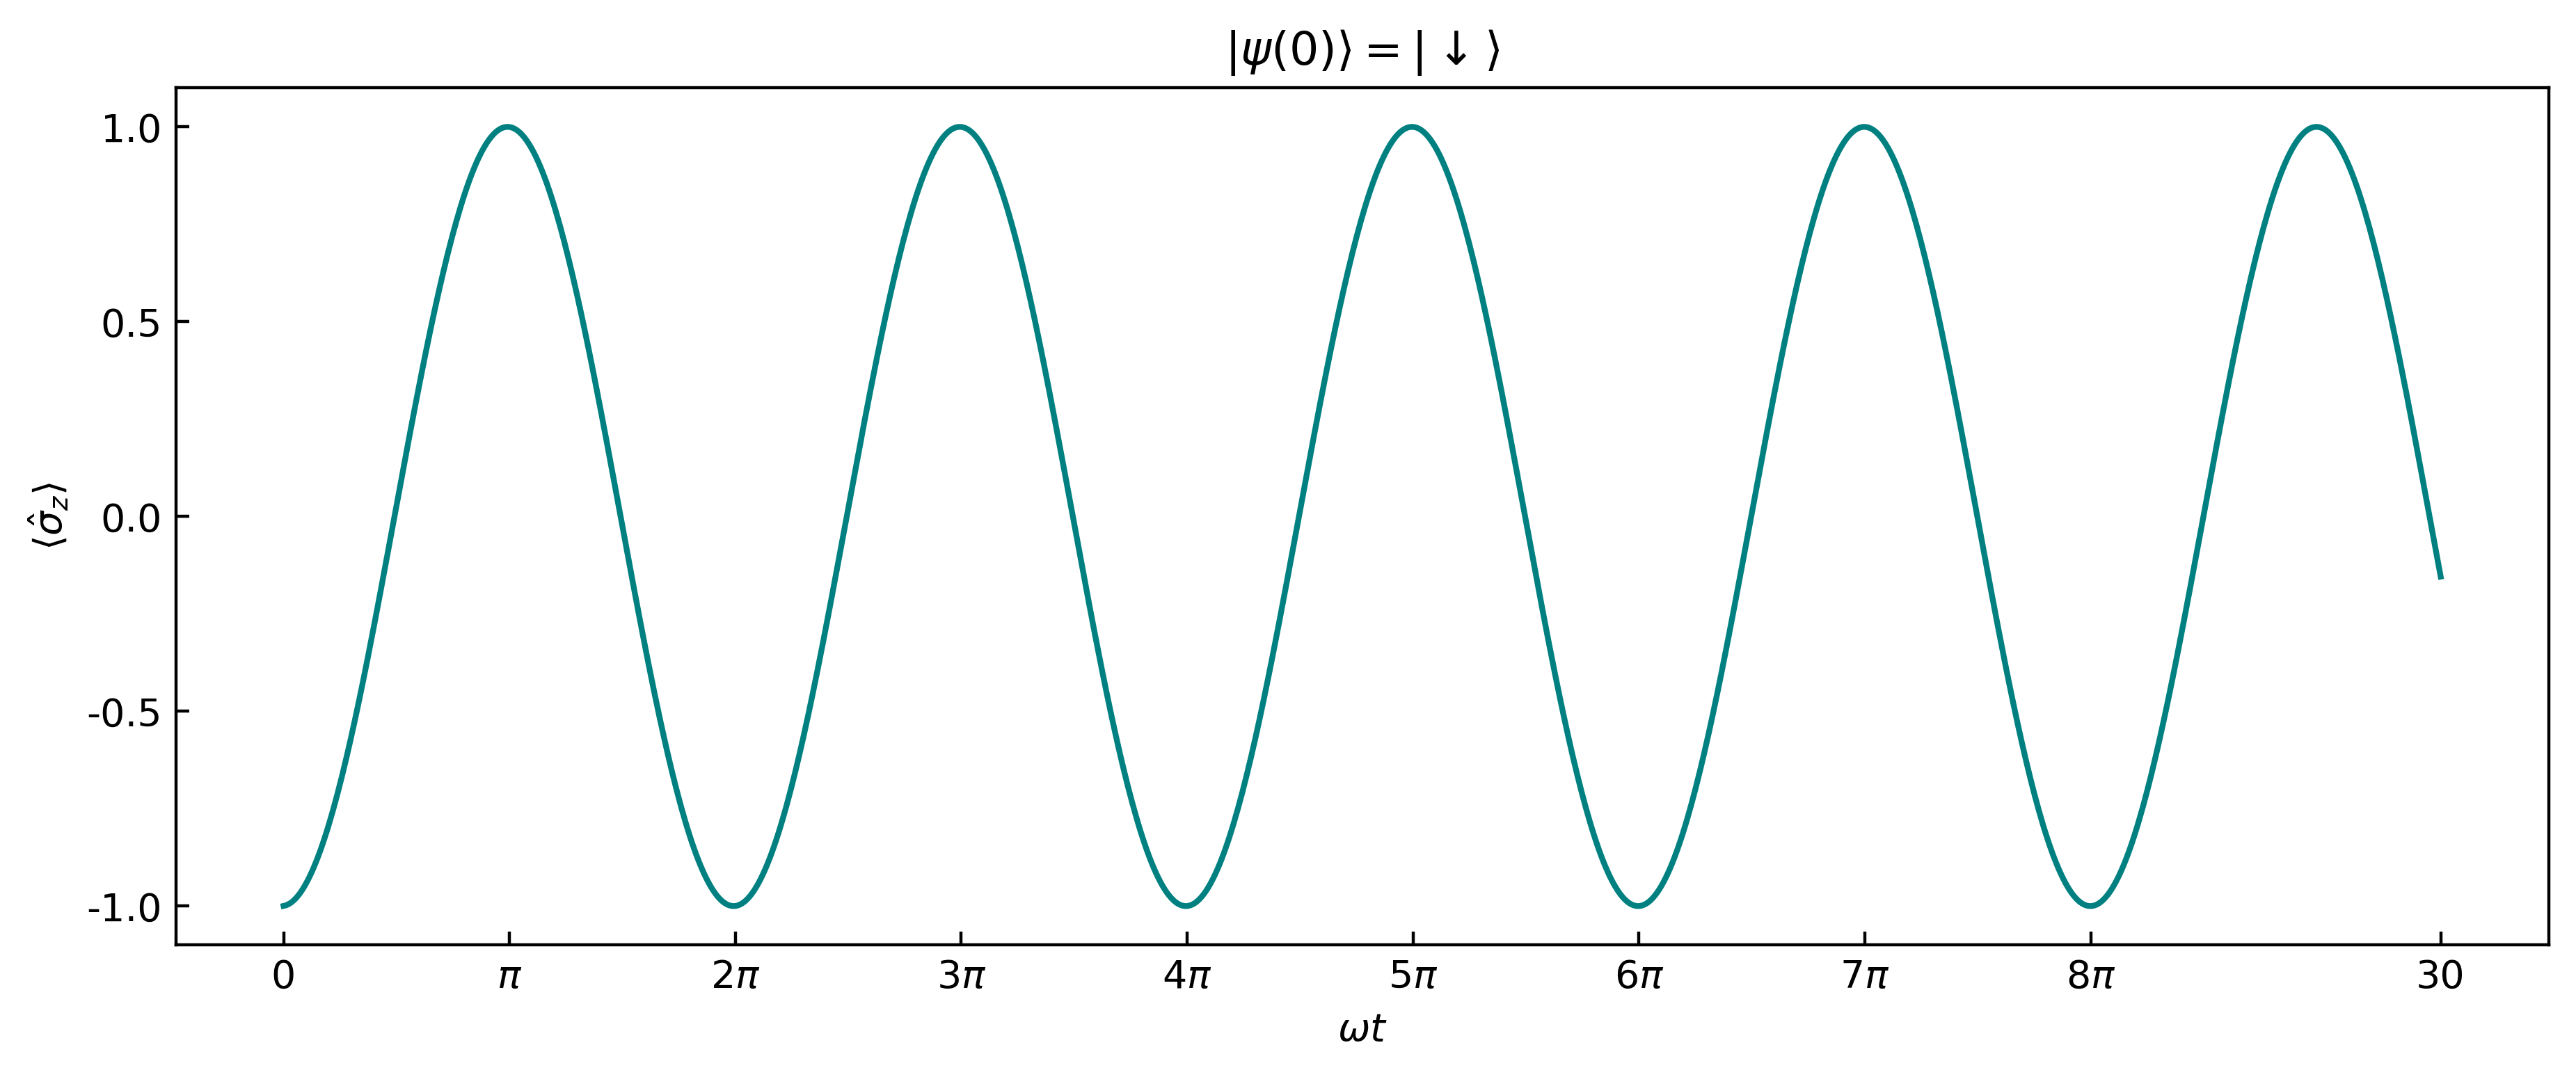

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

hw = 0.2
t_f = 30/hw #final value so that wt=30
N=1000 #amount to discretize
wt = np.linspace(0, t_f, N)
dt = t_f/N
#down state as initial state
initial_state = np.array([[0],
                          [1]])
#initial pauli matrix and other matrices constants
u = np.array([[1,1,0]]) * 1 / np.sqrt(2)
#define pauli and identity matrices
o_x = np.matrix([[0,1],[1,0]])
o_y = np.matrix([[0,-1j],[1j,0]])
o_z = np.matrix([[1,0],[0,-1]])
I = np.matrix([[1,0],[0,1]])
#hamiltonian
H = hw/2 * 1 / np.sqrt(2) * (o_x+o_y)

#unitary evolution
#function that calculates the time evolution matrix for every time
def U(time, operator, vector):
    final_vector = expm(-1j * time * operator) @ vector
    return final_vector
#calculates expectation value
def expectation_value(state, operator):
    #expectation value: $\langle \psi(t)|\hat{\sigma}_z|\psi(t)\rangle$
    expectation_value = state.T.conjugate() @ operator @ state
    return float(expectation_value.real)

states_in_time = []
#\psi(0) = down state
state = initial_state
for i in wt:
    #as we go through the period, we append the states in time as the time evoltion operator
    state = U(dt, H, state)
    states_in_time.append(state)
plt.figure(figsize = (11,4), dpi=400)
plt.plot(wt, [expectation_value(i, Z) for i in states_in_time], c='teal')
plt.xlabel(r'$\omega t$')
plt.ylabel(r'$\langle \hat{\sigma}_{z} \rangle$')
plt.xticks([np.pi * i/hw for i in range(9)]+[30/hw], ['0', r'$\pi$']+[r'$'+str(i+2)+'\pi$' for i in range(7)]+['30'])
plt.yticks([i/2 -1 for i in range(5)], [str(i/2 - 1) for i in range(5)])
plt.title(r'$|\psi(0)\rangle = |\downarrow\rangle$')
plt.tick_params(axis="both", direction="in")
plt.show()



